In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Random walk simulation

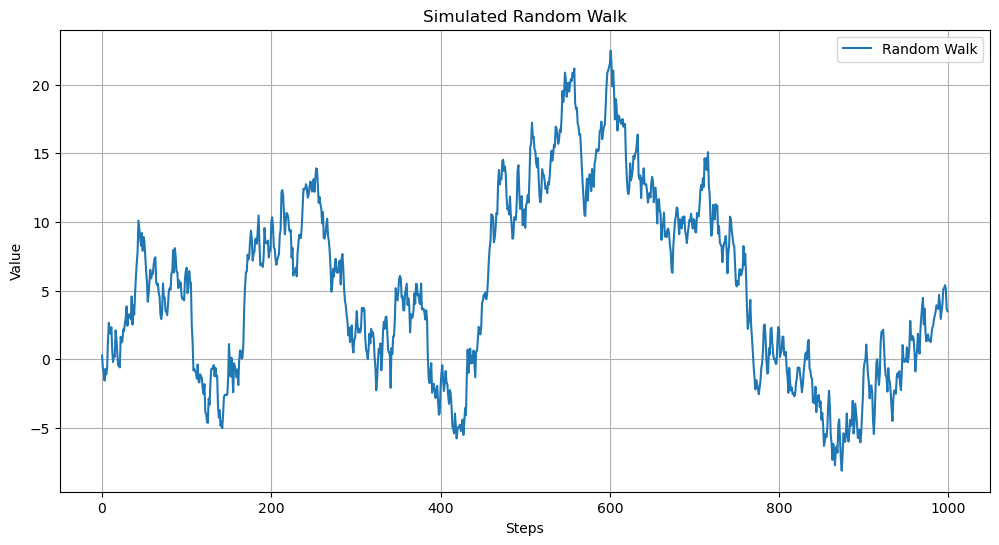

In [2]:
# Set seed for reproducibility
np.random.seed(43)

# Parameters
n_steps = 1000  # Length of the time series

# Generate white noise with standard normal distribution
# generate 100 random numbers from a standard normal (Gaussian) distribution
noise = np.random.standard_normal(n_steps)

# Simulate random walk: X[t] = X[t-1] + noise[t]
random_walk = np.cumsum(noise)  # Cumulative sum = random walk

# Create a time index
time = range(0, n_steps)

# Create DataFrame
df = pd.DataFrame({'Date': time, 'Value': random_walk})
df.set_index('Date', inplace=True)

# Plot the random walk
plt.figure(figsize=(12, 6))
plt.plot(df, label='Random Walk')
plt.title('Simulated Random Walk')
plt.xlabel('Steps')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

This code simulates a random walk by generating 1000 random values (white noise) from a standard normal distribution and calculating their cumulative sum. 

Each value in the series is the previous value plus a random shock. The result is plotted to show how the series evolves over time, illustrating the unpredictable and non-stationary nature of a random walk.

## Stationarity test on random walk

### Visual Inspection

We can see that there are sudden changes in the series and long periods of positive and negative trends.

Since this was a simulated example, we already know it follows a random walk. But with real-world data, we need proper methods to determine if a time series behaves like a random walk.

The presence of clear trends indicates that the series is not stationary.

Now let's do the Augmented Dickey-Fuller (ADF) test.

### ADF Test

In [3]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(random_walk)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -2.4168930859941145
p-value: 0.13702511524617406


Since the p-value is greater than 0.05, we fail to reject the null hypothesis — meaning the time series is not stationary.

### ACF Plot

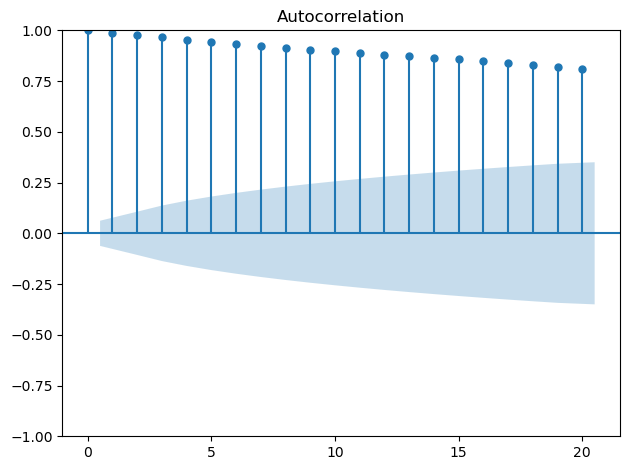

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(random_walk, lags=20)
plt.tight_layout()
plt.show()

If a time series shows an upward or downward trend, the values tend to remain high or low over time. This means that observations close in time (small lags) will likely be highly correlated, as high values now will often be followed by high values later (due to the trend).

In this case, the ACF will show high values for small lags, which then decrease gradually and linearly as the lag increases. This occurs because the correlation between values becomes weaker as they get farther apart, but the trend continues to influence the relationship, keeping points somewhat correlated even at larger lags.

You will observe that the autocorrelation coefficients slowly decrease as lag increases, which indicates that the series is not stationary.

The shaded area in the ACF plot represents the confidence interval. If the autocorrelation coefficient lies within this area, it is not significantly different from 0; if it lies outside, the correlation is significant.

Since our random walk is not stationary, we must apply a transformation, such as first-order differencing, to make it stationary. This is necessary to extract meaningful information from the ACF plot. First-order differencing removes trends but causes us to lose the first data point.

### Differencing the series

In [5]:
diff_random_walk = np.diff(random_walk, n=1) # difference by 1 step

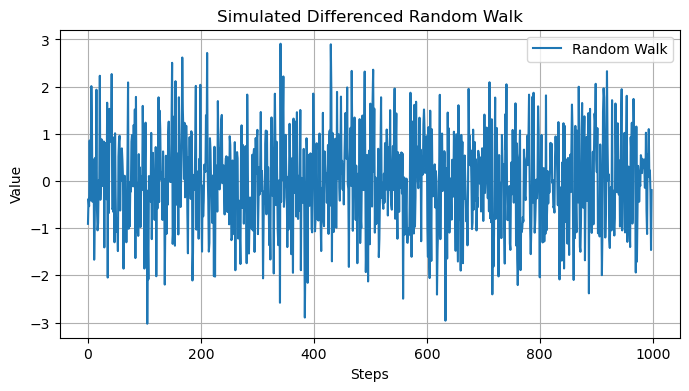

In [6]:
# Plot the differenced random walk
plt.figure(figsize=(8, 4))
plt.plot(diff_random_walk, label='Random Walk')
plt.title('Simulated Differenced Random Walk')
plt.xlabel('Steps')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
# Do the ADF test again to check stationarity

ADF_result = adfuller(diff_random_walk)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -30.80075735373415
p-value: 0.0


Since the p-value is less than 0.05, we reject the null hypothesis, indicating that the process does not have a unit root and is stationary.

Next, we will plot the ACF to examine the autocorrelation.

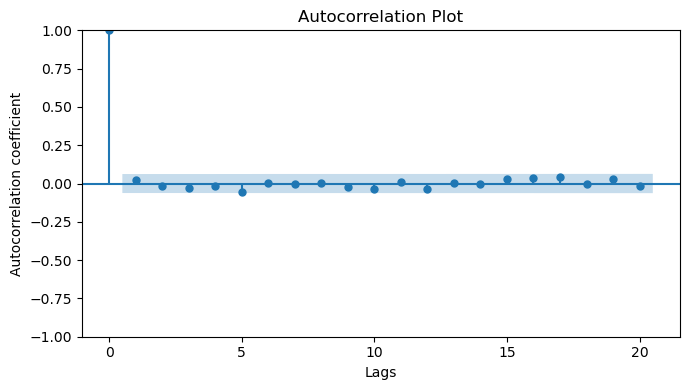

In [8]:
fig, ax = plt.subplots(figsize=(7, 4))
plot_acf(diff_random_walk, lags=20, ax=ax)

ax.set_xlabel("Lags")
ax.set_ylabel("Autocorrelation coefficient")
ax.set_title("Autocorrelation Plot")

plt.tight_layout()
plt.show()

You’ll notice that there are no significant autocorrelation coefficients beyond lag 0, which clearly indicates that we’re dealing with a random walk. This suggests that the stationary process is purely random, resembling white noise, where each value is just a random deviation from the previous one, with no correlation.

This is how we determine if a series follows a random walk. 

The most effective forecasting method for a random walk is a simple naive approach, where the forecast is based on the last observed value. If it’s not a random walk, models like AutoRegressive (AR), Moving Average (MA), or a combination of both, known as ARMA, should be used.